** AI-powered language translation tools**

***HOW TO WORK?***


*   **Enter a text sentence or provide a file path for a PDF or TXT document.**
*   **For PDF files, use the sliders to select the range of pages you want to translat**


*   **Choose the target language from the dropdown menu.**

***User Interface***:


*   **The user interface is designed to be user-friendly, with a clean layout.**

**1.File Path or Sentence: Textbox for entering a sentence or the path to a PDF/TXT file.**

**2.Start and End Page Sliders: Sliders for selecting page ranges (for PDFs only).**

**3.Language Dropdown: Dropdown menu to select the target translation language.**

**4.Download Option: Checkbox to enable downloading the translated text.**

**5.Filename Prefix: Textbox to add a custom prefix to the filename.**

**6.Submit Button: Button to start the translation process.**

**7.Translated Text Output: Textbox to display the translated text**.







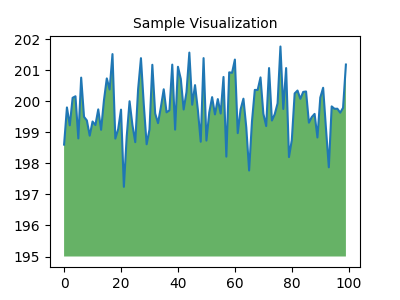

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [ ]:
# Install necessary libraries
!pip install gradio googletrans==4.0.0-rc1 PyPDF2

# Import necessary libraries
import os
import gradio as gr
from urllib.request import url2pathname
import googletrans
from googletrans import Translator, LANGUAGES
from PyPDF2 import PdfReader
import warnings
import os
import gradio as gr
from urllib.request import url2pathname
import googletrans
from googletrans import Translator, LANGUAGES
from PyPDF2 import PdfReader
import warnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 14.4 MB/s eta 0:00:00
INFO: pip is looking at multip

In [ ]:
# Ignore user warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Function to save translated text to a file and return the file path
def save_text_to_file(text, file_path, page_num, lang_code, file_name):
    # Create a "Pages" subdirectory in the same directory as the PDF file
    pages_folder = os.path.join(os.path.dirname(file_path), "Pages")
    os.makedirs(pages_folder, exist_ok=True)
    # Construct the output file name using the original file name, page number, and target language
    output_file_name = f"{os.path.splitext(os.path.basename(file_name))[0]}_page_{page_num}_{lang_code}.txt"
    # Construct the output file path by joining the "Pages" subdirectory and the output file name
    output_file_path = os.path.join(pages_folder, output_file_name)
    # Write the translated text to the output file
    with open(output_file_path, "w", encoding='utf-8') as output_file:
        output_file.write(text)
    # Return the output file path so that it can be used later for downloading etc.
    return output_file_path

In [ ]:
import os
import gradio as gr
from urllib.request import url2pathname
import googletrans
from googletrans import Translator, LANGUAGES
from PyPDF2 import PdfReader
import warnings

# Function to save the translated text to a file
def save_text_to_file(translated_text, file_path, page_num, target_lang, file_name):
    base_name = os.path.basename(file_path)
    name, ext = os.path.splitext(base_name)
    save_path = f"{file_name}_{name}_translated_page_{page_num}_to_{target_lang}.txt"
    with open(save_path, 'w', encoding='utf-8') as f:
        f.write(translated_text)

# Function to extract and translate text from a PDF or TXT file or a sentence
def extract_and_translate_text(text_or_file_path, start_page=0, end_page=0, target_lang='English', download=False, file_name=""):
    if not text_or_file_path:
        return "Error: Please provide a text sentence or a file path."

    if os.path.isfile(text_or_file_path):
        file_path = url2pathname(text_or_file_path.strip('\"')) if text_or_file_path.startswith('file://') else text_or_file_path
        file_extension = os.path.splitext(file_path)[1].lower()

        if file_extension == '.pdf':
            with open(file_path, 'rb') as pdf_file:
                pdf_reader = PdfReader(pdf_file)
                translated_text = ""
                for page_num in range(start_page, end_page + 1):
                    page = pdf_reader.pages[page_num]
                    text = page.extract_text()
                    try:
                        translated_page_text = Translator().translate(text, dest=target_lang).text
                    except googletrans.exceptions.GoogleTranslateError:
                        return "Error: Google Translate timed out. Please try again."
                    if download:
                        save_text_to_file(translated_page_text, file_path, page_num, target_lang, file_name)
                    translated_text += f"Page {page_num}:\n\n{translated_page_text}\n\n---\n\n"
        elif file_extension == '.txt':
            with open(file_path, 'r', encoding='utf-8') as txt_file:
                text = txt_file.read()
                try:
                    translated_text = Translator().translate(text, dest=target_lang).text
                except googletrans.exceptions.GoogleTranslateError:
                    return "Error: Google Translate timed out. Please try again."
                if download:
                    save_text_to_file(translated_text, file_path, 0, target_lang, file_name)
        else:
            return "Error: Unsupported file type. Please provide a PDF or TXT file."
    else:
        text = text_or_file_path
        try:
            translated_text = Translator().translate(text, dest=target_lang).text
        except googletrans.exceptions.GoogleTranslateError:
            return "Error: Google Translate timed out. Please try again."

    return translated_text


# Get a list of all languages for use by the user interface drop down selection input
language_choices = list(LANGUAGES.values())

# Create the Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("Enter a PDF or TXT file path from your local drive or paste in a sentence:")

    file_input = gr.Textbox(label='File Path or Sentence')
    start_page_slider = gr.Slider(label='Start page (PDF only)', minimum=0, maximum=100, step=1, value=0)
    end_page_slider = gr.Slider(label='End page (PDF only)', minimum=0, maximum=100, step=1, value=0)
    language_dropdown = gr.Dropdown(label='Please choose translation language from list:', choices=language_choices, value='English')
    download_checkbox = gr.Checkbox(label="Would you like to download the translation?", value=False)
    filename_input = gr.Textbox(label='Would you like to add a prefix to the file(s)', value="")

    output = gr.Textbox(label='Extracted and Translated Text')

    submit_button = gr.Button("Submit")

    submit_button.click(
        fn=extract_and_translate_text,
        inputs=[file_input, start_page_slider, end_page_slider, language_dropdown, download_checkbox, filename_input],
        outputs=output
    )

# Launch the Gradio interface
demo.launch()


IMPORTANT: You are using gradio version 4.19.1, however version 4.29.0 is available, please upgrade.
--------
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e4e1051e83e3155dbd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import os
import gradio as gr
from urllib.request import url2pathname
import googletrans
from googletrans import Translator, LANGUAGES
from PyPDF2 import PdfReader
import warnings

# Function to save the translated text to a file
def save_text_to_file(translated_text, file_path, page_num, target_lang, file_name):
    base_name = os.path.basename(file_path)
    name, ext = os.path.splitext(base_name)
    save_path = f"{file_name}_{name}_translated_page_{page_num}_to_{target_lang}.txt"
    with open(save_path, 'w', encoding='utf-8') as f:
        f.write(translated_text)

# Function to extract and translate text from a PDF or TXT file or a sentence
def extract_and_translate_text(text_or_file_path, start_page=0, end_page=0, target_lang='English', download=False, file_name=""):
    if not text_or_file_path:
        return "Error: Please provide a text sentence or a file path."

    if os.path.isfile(text_or_file_path):
        file_path = url2pathname(text_or_file_path.strip('\"')) if text_or_file_path.startswith('file://') else text_or_file_path
        file_extension = os.path.splitext(file_path)[1].lower()

        if file_extension == 'D1.pdf':
            with open(file_path, 'rb') as pdf_file:
                pdf_reader = PdfReader(pdf_file)
                translated_text = ""
                for page_num in range(start_page, end_page + 1):
                    page = pdf_reader.pages[page_num]
                    text = page.extract_text()
                    try:
                        translated_page_text = Translator().translate(text, dest=target_lang).text
                    except googletrans.exceptions.GoogleTranslateError:
                        return "Error: Google Translate timed out. Please try again."
                    if download:
                        save_text_to_file(translated_page_text, file_path, page_num, target_lang, file_name)
                    translated_text += f"Page {page_num}:\n\n{translated_page_text}\n\n---\n\n"
        elif file_extension == 'D2.txt':
            with open(file_path, 'r', encoding='utf-8') as txt_file:
                text = txt_file.read()
                try:
                    translated_text = Translator().translate(text, dest=target_lang).text
                except googletrans.exceptions.GoogleTranslateError:
                    return "Error: Google Translate timed out. Please try again."
                if download:
                    save_text_to_file(translated_text, file_path, 0, target_lang, file_name)
        else:
            return "Error: Unsupported file type. Please provide a PDF or TXT file."
    else:
        text = text_or_file_path
        try:
            translated_text = Translator().translate(text, dest=target_lang).text
        except googletrans.exceptions.GoogleTranslateError:
            return "Error: Google Translate timed out. Please try again."

    return translated_text

# Get a list of all languages for use by the user interface drop down selection input
language_choices = list(LANGUAGES.values())

# Define custom CSS
custom_css = """
body {
    background-color: #002366; /* Dark blue background */
    color: white; /* White text */
}

.gradio-container {
    background-color: #002366; /* Dark blue background */
    color: white; /* White text */
}

.gradio-container input,
.gradio-container textarea,
.gradio-container select {
    background-color: #002366; /* Dark blue background */
    color: white; /* White text */
}

.gradio-container .btn-primary {
    background-color: #004080; /* Slightly lighter blue for buttons */
    color: brownwhite; /* White text */
}

.gradio-container .btn-primary:hover {
    background-color: #0059b3; /* Even lighter blue for button hover state */
    color: white; /* White text */
}
"""

# Create the Gradio interface
with gr.Blocks(css=custom_css) as demo:
    gr.Markdown("Enter a PDF or TXT file path from your local drive or paste in a sentence:")

    file_input = gr.Textbox(label='File Path or Sentence')
    start_page_slider = gr.Slider(label='Start page (PDF only)', minimum=0, maximum=100, step=1, value=0)
    end_page_slider = gr.Slider(label='End page (PDF only)', minimum=0, maximum=100, step=1, value=0)
    language_dropdown = gr.Dropdown(label='Please choose translation language from list:', choices=language_choices, value='English')
    download_checkbox = gr.Checkbox(label="Would you like to download the translation?", value=False)
    filename_input = gr.Textbox(label='Would you like to add a prefix to the file(s)', value="")

    output = gr.Textbox(label='Extracted and Translated Text')

    submit_button = gr.Button("Submit")

    submit_button.click(
        fn=extract_and_translate_text,
        inputs=[file_input, start_page_slider, end_page_slider, language_dropdown, download_checkbox, filename_input],
        outputs=output
    )

# Launch the Gradio interface
demo.launch()


IMPORTANT: You are using gradio version 4.19.1, however version 4.29.0 is available, please upgrade.
--------
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9d6b123e78e6f8e43a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
